In [1]:
import torch

In [2]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [4]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

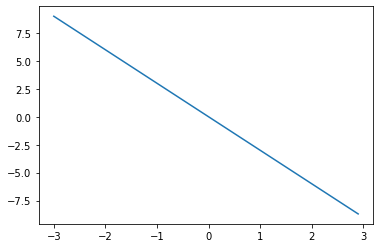

In [5]:
import matplotlib.pyplot as plt

plt.plot(X.numpy(), f.numpy())
plt.show()

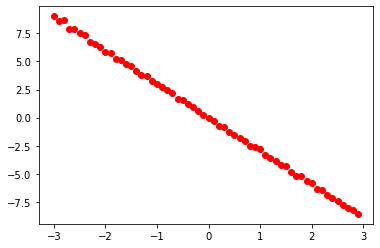

In [6]:
Y = f + 0.1 * torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), "ro")
plt.show()

In [7]:
def forward(x):
    return w * x + b

def cost(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

In [8]:
lr = 0.1
for epoch in range(4):
    for x, y in zip(X, Y):
        y_hat = forward(x)
        loss = cost(y_hat, y)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

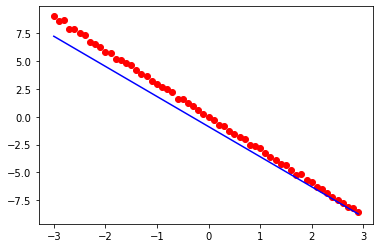

In [10]:
plt.plot(X.numpy(), Y.numpy(), "ro")
plt.plot(X.numpy(), forward(X).detach().numpy(), "b")
plt.show()

In [13]:
# using dataloader

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.X = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.Y = -3 * X + 1
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

    def __len__(self):
        return self.len

dataset = Data()

In [14]:
dataset[0]

(tensor([-3.]), tensor([10.]))

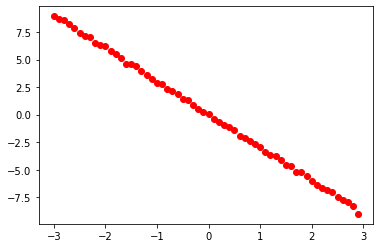

In [19]:
train_loader = DataLoader(dataset, batch_size=1)

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X
Y = f + 0.1 * torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), "ro")
plt.show()


In [34]:

for x, y in train_loader:
    print(x, y)
    y_hat = forward(x)
    loss = cost(y_hat, y)
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

tensor([[-3.]]) tensor([[10.]])
tensor([[-2.9000]]) tensor([[9.7000]])
tensor([[-2.8000]]) tensor([[9.4000]])
tensor([[-2.7000]]) tensor([[9.1000]])
tensor([[-2.6000]]) tensor([[8.8000]])
tensor([[-2.5000]]) tensor([[8.5000]])
tensor([[-2.4000]]) tensor([[8.2000]])
tensor([[-2.3000]]) tensor([[7.9000]])
tensor([[-2.2000]]) tensor([[7.6000]])
tensor([[-2.1000]]) tensor([[7.3000]])
tensor([[-2.]]) tensor([[7.]])
tensor([[-1.9000]]) tensor([[6.7000]])
tensor([[-1.8000]]) tensor([[6.4000]])
tensor([[-1.7000]]) tensor([[6.1000]])
tensor([[-1.6000]]) tensor([[5.8000]])
tensor([[-1.5000]]) tensor([[5.5000]])
tensor([[-1.4000]]) tensor([[5.2000]])
tensor([[-1.3000]]) tensor([[4.9000]])
tensor([[-1.2000]]) tensor([[4.6000]])
tensor([[-1.1000]]) tensor([[4.3000]])
tensor([[-1.]]) tensor([[4.]])
tensor([[-0.9000]]) tensor([[3.7000]])
tensor([[-0.8000]]) tensor([[3.4000]])
tensor([[-0.7000]]) tensor([[3.1000]])
tensor([[-0.6000]]) tensor([[2.8000]])
tensor([[-0.5000]]) tensor([[2.5000]])
tensor([[

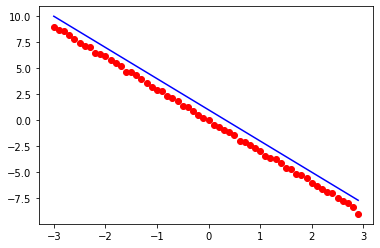

In [35]:
plt.plot(X.numpy(), Y.numpy(), "ro")
plt.plot(X.numpy(), forward(X).detach().numpy(), "b")
plt.show()